# 1. Data Preperation, Preprocessing and Cleaning

## 1.1 Import Libraries and Load Datasets

In [62]:
import pandas as pd
import numpy as np
import math
import utm
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_excel("Households_Data.xlsx", sheet_name='Hogares')

In [64]:
dictionary = pd.read_excel("Households_Data.xlsx", sheet_name='Dictionary')

## 1.2 Identify Column Data Types

Knowing the type of data in each column not only helps one understand the data better, but is also important to selecting the suitable machine learning algorithms later. In this section, we would like to take a closer look at the `dictionary` dataset, and identify which columns are categorical data and which are continuous data from its descriptions.

In [65]:
dictionary

,Variable,Description,Used in Model?
0,Hogar,ID of Household,NaN
1,EXCLUIR,Exclude from estimation,NaN
2,paraValidacion,sample for validation,NaN
3,Sector,Exogenous sector (7 sectors used for exogenous...,YES (Segmentation in Exogenous Zones Model)
4,DirCoordX,UTM coordinate X,NaN
5,DirCoordY,UTM coordinate Y,NaN
6,MontoArr,Monthly dwelling rent (Chilean Peso),YES (Likelihood function)
7,IngresoHogar,Household income (Chilean Peso),NaN
8,Factor,Expansion factor of household in survey,NaN
9,AnosEstudio,Years of formal Education of head of household,NaN


From the description column, we would make an informed guess about which columns are categorical and which are continuous.
<br>
<br>
Our guess is `{Hogar, EXCLUIR, paraValidacion, Sector, CLASE, CLUSTER7, CLUSTER2}` are categorical.

In [66]:
categorical_1=['Hogar', 'EXCLUIR', 'paraValidacion', 
               'Sector', 'CLASE', 'CLUSTER7', 'CLUSTER2']

From the description of the dataset, it is not always easy to distinguish categorical features from continuous ones. Therefore, we decide to examine the unique values in the dataset.
<br>
<br>
This is based on the idea that the number of unique values in a column would, in general (not always), indicates whether that column is of categorical data type or continuous data type. 

In [67]:
for c in df.columns:
    print(c + " has " + str(df[c].nunique()) + " unique values")

Hogar has 18264 unique values
EXCLUIR has 2 unique values
paraValidacion has 2 unique values
Sector has 7 unique values
DirCoordX has 16940 unique values
DirCoordY has 16930 unique values
MontoArr has 4432 unique values
IngresoHogar has 12905 unique values
Factor has 6433 unique values
AnosEstudio has 23 unique values
CLASE has 4 unique values
Sup_Prom_Constr_Hab_EOD has 452 unique values
Calid_EOD_norm_inv has 7 unique values
DensConstr_EOD has 421 unique values
Dist_est_Metro_MC_KM has 16952 unique values
Dist_salida_Autop_MC_KM has 16952 unique values
Tiempo_Com_Stgo has 98 unique values
Ingreso_Promedio_Zona_MM has 789 unique values
Acc_Comercio_tpte_pub has 631 unique values
Acc_Educacion_tpte_pub has 631 unique values
Acc_Habitacion_tpte_pub has 631 unique values
Acc_Industria_tpte_pub has 631 unique values
Acc_Servicios_tpte_pub has 631 unique values
Acc_Comercio_auto has 637 unique values
Acc_Educacion_auto has 635 unique values
Acc_Habitacion_auto has 637 unique values
Acc_Ind

After observing the number of unique values in each column, we update our list of categorical features and it now includes: `{EXCLUIR, paraValidacion, Sector, CLASE, Calid_EOD_norm_inv, CLUSTER7, CLUSTER2}` are categorical.

In [68]:
categorical_2=['EXCLUIR', 'paraValidacion', 'Sector', 'CLASE', 
               'Calid_EOD_norm_inv', 'CLUSTER7', 'CLUSTER2']

For columns that appear in both `categorical_1` and `categorical_2 lists`, we will take them as categorical data. We will take a closer look at the rest of the columns that only appear in one of the lists.

In [69]:
# in categorical_1 but not in categorical_2
set(categorical_1)-set(categorical_2)

{'Hogar'}

`Hogar` is the housing ID which is by definition categorical but we will omit it because ID is just a serial number which will not add insight in the predictive analysis

In [70]:
# in categorical_2 but not in categorical_1
set(categorical_2)-set(categorical_1)

{'Calid_EOD_norm_inv'}

In [71]:
df['Calid_EOD_norm_inv'].unique().tolist()

[0.98, 1.0, 0.78, 0.93, 0.36, 0.55, 0.0]

It seems that `Calid_EOD_norm_inv` is continuous. Indeed, from the description it can be seen that Average Construction Quality should indeed be a continuous feature. Thus, we treat this column as continuous.

In [72]:
categorical = set(categorical_1 + categorical_2)
categorical -= {'Hogar','Calid_EOD_norm_inv'}
categorical = list(categorical)

Thus, we reach the conclusion that the following columns are categorical:

In [73]:
categorical

['CLASE', 'EXCLUIR', 'paraValidacion', 'CLUSTER2', 'Sector', 'CLUSTER7']

The rest of the columns are thus continuous

## 1.3 Drop Irrelevant Columns

After close inspection on the variable descriptions, we decided to remove columns which have limited contribution to the prediction task. We will remove:

* `Hogar`, as it is just the ID of the data entries
* `paraValidacion`, as it seems to be used for validation for some other studies, which makes this column have little relevance to our task.

In [74]:
df = df.drop(['Hogar', 'paraValidacion'], axis=1)

Update our `categorical` list too:

In [75]:
categorical.remove('paraValidacion')

In [76]:
categorical

['CLASE', 'EXCLUIR', 'CLUSTER2', 'Sector', 'CLUSTER7']

## 1.4 Rename Columns

The current column names are difficult to understand, so we rename them.

In [77]:
df = df.rename(columns={'EXCLUIR': 'excluded_from_estimation',
                   'Sector': 'exogenous_sector', 
                   'DirCoordX' : 'UTM_East',
                   'DirCoordY' : 'UTM_North', 
                   'MontoArr' : 'monthly_rent',
                   'IngresoHogar' : 'household_income', 
                   'Factor' : 'survey_factor',
                   'AnosEstudio' : 'education_years', 
                   'CLASE' : 'type',
                   'Sup_Prom_Constr_Hab_EOD': 'built_surface',
                   'Calid_EOD_norm_inv' : 'construction_quality',
                   'DensConstr_EOD' : 'build_density', 
                   'Dist_est_Metro_MC_KM' : 'subway_dis',
                   'Dist_salida_Autop_MC_KM' : 'highway_dis', 
                   'Tiempo_Com_Stgo' : 'time_CBD',
                   'Ingreso_Promedio_Zona_MM' : 'avg_zone_income',
                   'Acc_Comercio_tpte_pub' : 'commerce_transit', 
                   'Acc_Educacion_tpte_pub' : 'eduction_transit',
                   'Acc_Habitacion_tpte_pub' : 'habitational_transit', 
                   'Acc_Industria_tpte_pub' : 'industry_transit',
                   'Acc_Servicios_tpte_pub' : 'service_transit',
                   'Acc_Comercio_auto' : 'commerce_car',
                   'Acc_Educacion_auto' : 'education_car',
                   'Acc_Habitacion_auto' : 'education_car',
                   'Acc_Habitacion_auto' : 'habitational_car',
                   'Acc_Industria_auto' : 'industry_car',
                   'Acc_Servicios_auto' : 'service_car',
                   'CLUSTER7' : 'cluster_7',
                   'CLUSTER2' : 'cluster_2'
                  })

Lastly, we need to update our categorical list.

In [78]:
# update categorical list
print("original : ")
print(categorical)
categorical = ['cluster_7', 'type', 'excluded_from_estimation', 'cluster_2', 'exogenous_sector']
print("updated : ")
print(categorical)

original : 
['CLASE', 'EXCLUIR', 'CLUSTER2', 'Sector', 'CLUSTER7']
updated : 
['cluster_7', 'type', 'excluded_from_estimation', 'cluster_2', 'exogenous_sector']


and continuous list too

In [99]:
continuous = list(set(df.columns) - set(categorical))
continuous

['eduction_transit',
 'monthly_rent',
 'avg_zone_income',
 'construction_quality',
 'survey_factor',
 'commerce_transit',
 'education_years',
 'service_car',
 'education_car',
 'habitational_car',
 'industry_car',
 'build_density',
 'subway_dis',
 'longitude',
 'service_transit',
 'household_income',
 'industry_transit',
 'time_CBD',
 'commerce_car',
 'habitational_transit',
 'built_surface',
 'latitude',
 'highway_dis']

## 1.5 Handle Missing Values
Check if the dataset contains any missing value in its entries, and handle these missing values if they exist.

In [79]:
# check for NaNs
for column in df.columns:
    print("column {} has {} null value".format(column, df[column].isnull().sum().sum()))

column excluded_from_estimation has 0 null value
column exogenous_sector has 0 null value
column UTM_East has 0 null value
column UTM_North has 0 null value
column monthly_rent has 0 null value
column household_income has 0 null value
column survey_factor has 0 null value
column education_years has 0 null value
column type has 0 null value
column built_surface has 0 null value
column construction_quality has 0 null value
column build_density has 0 null value
column subway_dis has 0 null value
column highway_dis has 0 null value
column time_CBD has 0 null value
column avg_zone_income has 0 null value
column commerce_transit has 0 null value
column eduction_transit has 0 null value
column habitational_transit has 0 null value
column industry_transit has 0 null value
column service_transit has 0 null value
column commerce_car has 0 null value
column education_car has 0 null value
column habitational_car has 0 null value
column industry_car has 0 null value
column service_car has 0 null va

It can be seen from the result above that this dataset does not have any NaNs.

Now, check if there are any entry with a value of -99 (meaning that the respondent of the survey didn't answer that question)

In [80]:
# find all columns that contain the value -99
no_response_col = []
for col in df.columns:
    if df[col].isin([-99]).any():
        no_response_col.append(col)
no_response_col

['education_years',
 'type',
 'time_CBD',
 'commerce_transit',
 'eduction_transit',
 'habitational_transit',
 'industry_transit',
 'service_transit',
 'commerce_car',
 'education_car',
 'habitational_car',
 'industry_car',
 'service_car']

In [81]:
# find the indices of the rows containing at least one entry that equals to -99
index_list = []
for index, row in df.iterrows():
    for col in no_response_col:
        if row[col] == -99:
            index_list.append(index)
            continue

In [82]:
# obtain the dataframe in which at least one value in a row is -99
no_response_df = df[df.index.isin(index_list)]
no_response_df

,excluded_from_estimation,exogenous_sector,UTM_East,UTM_North,monthly_rent,household_income,survey_factor,education_years,type,built_surface,...,habitational_transit,industry_transit,service_transit,commerce_car,education_car,habitational_car,industry_car,service_car,cluster_7,cluster_2
20,1,7,341877.0000,6270590.000,193981,600000,15.152181,-99,-99,75.8,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
473,1,2,340618.1836,6292159.436,160000,0,58.908264,-99,-99,58.0,...,18595.82690,2345.57027,1730.19648,6270.54,3631.50,62639.45,6083.56,6461.99,5,1
571,1,2,339850.7695,6301456.322,150000,111590,76.265007,-99,-99,41.6,...,20220.31465,2055.68218,2260.59053,6989.71,3866.75,65484.20,6142.82,7967.46,3,1
1351,1,1,345723.6978,6304693.506,130000,903627,105.309120,-99,-99,38.6,...,20287.68567,2485.45627,2800.63140,6584.60,3617.13,62135.37,5610.12,7735.47,2,1
1425,1,5,346330.7654,6286289.991,80000,91205,146.960342,-99,-99,50.3,...,31896.73297,2730.34489,3518.55023,6317.66,3816.16,64953.69,5615.28,6275.97,5,1
1526,1,6,357176.7954,6295599.982,132729,30193,146.835587,-99,-99,41.6,...,16481.15954,754.33117,1407.08549,5505.48,3185.88,56497.30,4144.63,5796.40,5,1
1772,1,6,351826.1108,6287711.495,153907,45829,92.318352,-99,-99,42.5,...,31818.42382,1568.82854,2829.39221,6146.96,3743.58,64619.84,5250.59,6045.88,2,1
1780,1,5,343490.3392,6286980.431,112329,295741,70.119965,-99,-99,39.5,...,29073.79277,2608.05899,2964.73310,6938.10,4058.30,68584.75,6280.98,7144.38,5,1
2712,1,7,327182.8958,6265116.542,90000,650000,21.323198,-99,-99,0.0,...,1353.46220,172.28472,132.02718,1048.44,613.41,10859.53,1030.76,1061.18,3,1
2734,1,7,327426.2079,6265272.163,80000,86061,35.299995,-99,-99,0.0,...,1353.46220,172.28472,132.02718,1048.44,613.41,10859.53,1030.76,1061.18,3,1


calculate the proportion of the dataframe that contains no response (-99)

In [83]:
len(no_response_df)

423

In [84]:
len(no_response_df)/len(df)

0.023160315374507228

Proportion of non-response is 0.023 which is relatively small. Thus, we decide to drop the non-response rows to prevent the value -99 from interfering with our predictions.

In [85]:
df = df.drop(index_list, axis = 0)

In [86]:
df

,excluded_from_estimation,exogenous_sector,UTM_East,UTM_North,monthly_rent,household_income,survey_factor,education_years,type,built_surface,...,habitational_transit,industry_transit,service_transit,commerce_car,education_car,habitational_car,industry_car,service_car,cluster_7,cluster_2
0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
5,0,7,338520.4611,6267243.590,120000,415053,122.001518,9,1,43.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
6,0,7,338672.2754,6267348.648,90000,231227,98.045624,15,2,43.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
7,0,7,338923.4993,6266488.784,140000,79133,114.663483,11,1,53.8,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
8,0,7,339472.5195,6262741.680,132271,1334494,118.012085,12,2,59.6,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
9,0,7,334850.7817,6266124.316,138696,1543874,108.940498,14,2,53.8,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


## 1.6 Standardize Currency Units
`avg_zone_income` is in Million Chilean Peso. However, `monthly_rent` and `household_income` are in Chilean Peso. We would like to standardize `avg_zone_income` to Chilean Peso.

In [87]:
df['avg_zone_income'] =  df['avg_zone_income'] * 1000000

## 1.7 Utilize Coordinate Data
The coordinate data given in the data set is in UTM format. It is of little help to us because it only pinpoints the geographical location of each data point. We have to quantify it into some more useful information such that it can be used as a feature into any machine learning algorithm.

For example, one way is to obtain the distance between a location and the city center.

In order to obtain the distance, we resort to Google Maps API. Unfortunately, Google Maps API does not support UTM format. Thus, we need to convert UTM into latitude and longitude information. Luckily, Python has a package named `utm` that helps us do the job (https://github.com/Turbo87/utm).

### 1.7.1 Convert UTM Format To Lat/Lon Format

We define a function to convert UTM format to Lat/Lon format.

Since the dataset does not contain zone and latitude band information for Santiago, we read up online (https://www.gps-latitude-longitude.com/gps-coordinates-of-santiago-de-chile) and learn that the zone is 19 and latitude band is 'H'.

In [88]:
def getLatLon(east, north):
    return utm.to_latlon(east, north, 19, 'H')

Again, we define a function to extract lat/lon information and store this information into two new columns, `latitude` and `longitude`.

In [89]:
def LatLonColumns():
    res=[]
    east=df.UTM_East.tolist()
    north=df.UTM_North.tolist()
    for i in range(len(east)):
        res.append(getLatLon(east[i],north[i]))
    return res

In [90]:
res = LatLonColumns()
latitude = list(map(lambda x : x[0], res))
longitude = list(map(lambda x : x[1], res))

In [91]:
df['latitude'] = latitude
df['longitude'] = longitude

With latitude and longtitude information, we do not need UTM information any more.

In [92]:
df = df.drop(['UTM_East', 'UTM_North'], axis = 1)

### 1.7.2 Obtain Distance to City Center with Google Maps API

In order to get the latitude and longitude information of the city center, we search for Santiago, Chile on [Google Maps](https://www.google.dk/maps/place/Santiago,+Santiago+Metropolitan+Region,+Chile/@-33.4724228,-70.7699155,11z/data=!3m1!4b1!4m13!1m7!3m6!1s0x9662c5410425af2f:0x8475d53c400f0931!2sSantiago,+Santiago+Metropolitan+Region,+Chile!3b1!8m2!3d-33.4488897!4d-70.6692655!3m4!1s0x9662c5410425af2f:0x8475d53c400f0931!8m2!3d-33.4488897!4d-70.6692655) and use the coordinates of the search result as the location of the city center. Its latitude is -33.446896, and longitude is -70.673124.

Next, our group uses Google Maps API to obtain: 
* Distance between each housing to the city center, by driving

In [41]:
# Google map api key
APIKey = "your api key"

We define a function which takes in latitude and longitude of a place and returns the distance to travel to city center of Santiago by car, at 10am on 30th Dec 2019.

In [59]:
def getDisDur(lat,lon):
    
    response = requests.get('https://maps.googleapis.com/maps/api/distancematrix/json',
                            params={'units': 'metric',
                                    'origins' : str(lat) + ',' + str(lon),
                                    'destinations' : '-33.446896,-70.673124',
                                    'departure_time' : 1577700000, # Unix epoch time in seconds for 10am on 30th Dec 2019 GMT
                                    'key' : APIKey})
    
    data = response.json()['rows'][0]['elements'][0]
    distance = data['distance']['value']
    
    return distance

The function below runs API calls thousands of times, we store the data requested into dataframe. As such, the function below only needs to be run once.

In [60]:
def DisDurCol():
    
    latitude=df.latitude.tolist()
    longitude=df.longitude.tolist()
    res=[]
    for i in range(len(latitude)):
        res.append(getDisDur(latitude[i],longitude[i]))
        
        # track the progress
        if i % 1000 == 0:
            print("{} rows done".format(i))
    
    return res

In [61]:
# res = DisDurCol()

0 rows done
1000 rows done
2000 rows done
3000 rows done
4000 rows done
5000 rows done
6000 rows done
7000 rows done
8000 rows done
9000 rows done
10000 rows done
11000 rows done
12000 rows done
13000 rows done
14000 rows done
15000 rows done
16000 rows done
17000 rows done


We extract the distance data and store it in a new column.

In [66]:
# df['Distance_CityCenter'] = res

Write the cleaned dataframe into a csv file. From now onwards, we will just need to load this csv file.

In [68]:
# df.to_csv("cleaned_data.csv")

### 1.7.3 Load the cleaned csv file into a pandas dataframe

In [2]:
df_cleaned = pd.read_csv("cleaned_data.csv", index_col = 0)

In [3]:
df_cleaned.head()

,excluded_from_estimation,exogenous_sector,monthly_rent,household_income,survey_factor,education_years,type,built_surface,construction_quality,build_density,...,commerce_car,education_car,habitational_car,industry_car,service_car,cluster_7,cluster_2,latitude,longitude,Distance_CityCenter
0,0,7,100000,450845,136.393738,11,1,53.8,0.98,0.059,...,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-33.729444,-70.779035,38728
1,0,7,120000,1019369,73.843597,11,1,59.6,0.98,0.033,...,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-33.737278,-70.744340,35583
2,0,7,70000,80000,180.722809,10,1,59.5,0.98,0.004,...,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-33.805994,-70.859656,53214
3,0,7,80000,559259,150.379059,14,2,59.5,0.98,0.004,...,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-33.805995,-70.859654,53214
4,0,7,117771,710309,122.001518,12,2,43.6,0.98,0.086,...,3036.41,1781.81,30505.65,2853.19,3058.03,3,1,-33.722055,-70.743270,36504


## 1.8 Utilize Zones Shapefiles
In this section, we would like to utilize the shapefiles to:
1. visualize the zones in the city
2. identify which zone each house belongs to, so that we can supplement the feature space with more zone-specific features.

### 1.8.1 Read Shapefiles into a pandas dataframe

In [4]:
import geopandas as gpd

In [5]:
# enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# read respective files
dbf=gpd.read_file("Zones_shapefiles/ZonasEOD2012.dbf", encoding = "utf-8")
shx=gpd.read_file("Zones_shapefiles/ZonasEOD2012.shx", encoding = "utf-8")
shp=gpd.read_file("Zones_shapefiles/ZonasEOD2012.shp", encoding = "utf-8")
kml = gpd.read_file("Zones_shapefiles/zonasEOD2012.kml", encoding = "utf-8")

In [6]:
dbf.head(2)

,ID,Com,Comuna,AREA-Ha,Excluir,geometry
0,318.0,13114,Las Condes,284.61,1,"POLYGON ((360300.775 6301887.505, 360374.722 6..."
1,311.0,13114,Las Condes,355.05,0,"POLYGON ((362168.093 6305423.532, 362114.496 6..."


In [7]:
shx.head(2)

,ID,Com,Comuna,AREA-Ha,Excluir,geometry
0,318.0,13114,Las Condes,284.61,1,"POLYGON ((360300.775 6301887.505, 360374.722 6..."
1,311.0,13114,Las Condes,355.05,0,"POLYGON ((362168.093 6305423.532, 362114.496 6..."


In [8]:
shp.head(2)

,ID,Com,Comuna,AREA-Ha,Excluir,geometry
0,318.0,13114,Las Condes,284.61,1,"POLYGON ((360300.775 6301887.505, 360374.722 6..."
1,311.0,13114,Las Condes,355.05,0,"POLYGON ((362168.093 6305423.532, 362114.496 6..."


In [9]:
kml.head(2)

,Name,Description,geometry
0,,,"POLYGON ((-70.50243 -33.41327, -70.50160 -33.4..."
1,,,"POLYGON ((-70.48181 -33.38163, -70.48239 -33.3..."


In [10]:
print("Shape of dbf dataframe is: {}".format(dbf.shape))
print("Shape of shx dataframe is: {}".format(shx.shape))
print("Shape of shp dataframe is: {}".format(shp.shape))
print("Shape of kml dataframe is: {}".format(kml.shape))

Shape of dbf dataframe is: (866, 6)
Shape of shx dataframe is: (866, 6)
Shape of shp dataframe is: (866, 6)
Shape of kml dataframe is: (866, 3)


In [11]:
shp.Comuna.nunique()

45

In [12]:
shp.Comuna.unique()

array(['Las Condes', 'Colina', 'Lo Barnechea', 'San Miguel', 'Lampa',
       'Vitacura', 'Santiago', 'Recoleta', 'Huechuraba', 'Pudahuel',
       'La Reina', 'PeÃ±alolÃ©n', 'Ã‘uÃ±oa', 'La Florida', 'Providencia',
       'Macul', 'San JoaquÃ\xadn', 'Quilicura', 'San RamÃ³n', 'La Granja',
       'ConchalÃ\xad', 'Independencia', 'Renca', 'Quinta Normal',
       'Cerro Navia', 'Pedro Aguirre Cerda', 'EstaciÃ³n Central',
       'Cerrillos', 'La Cisterna', 'El Bosque', 'Lo Espejo', 'MaipÃº',
       'Lo Prado', 'Puente Alto', 'La Pintana', 'San Bernardo',
       'PeÃ±aflor', 'Buin', 'Pirque', 'Padre Hurtado', 'Talagante',
       'Calera de Tango', 'Isla de Maipo', 'El Monte', 'Melipilla'],
      dtype=object)

In [13]:
shp.Com.nunique()

45

In [14]:
shp.Com.unique()

array(['13114', '13301', '13115', '13130', '13302', '13132', '13101',
       '13127', '13107', '13124', '13113', '13122', '13120', '13110',
       '13123', '13118', '13129', '13125', '13131', '13111', '13104',
       '13108', '13128', '13126', '13103', '13121', '13106', '13102',
       '13109', '13105', '13116', '13119', '13117', '13201', '13112',
       '13401', '13605', '13402', '13202', '13604', '13601', '13403',
       '13603', '13602', '13501'], dtype=object)

it seems like `Com` is the ID for `Comuna`. Verify this by performing two groupby operations.

In [15]:
shp.groupby('Com')['Comuna'].nunique()

Com
13101    1
13102    1
13103    1
13104    1
13105    1
13106    1
13107    1
13108    1
13109    1
13110    1
13111    1
13112    1
13113    1
13114    1
13115    1
13116    1
13117    1
13118    1
13119    1
13120    1
13121    1
13122    1
13123    1
13124    1
13125    1
13126    1
13127    1
13128    1
13129    1
13130    1
13131    1
13132    1
13201    1
13202    1
13301    1
13302    1
13401    1
13402    1
13403    1
13501    1
13601    1
13602    1
13603    1
13604    1
13605    1
Name: Comuna, dtype: int64

In [16]:
shp.groupby('Comuna')['Com'].nunique()

Comuna
Buin                   1
Calera de Tango        1
Cerrillos              1
Cerro Navia            1
Colina                 1
ConchalÃ­              1
El Bosque              1
El Monte               1
EstaciÃ³n Central      1
Huechuraba             1
Independencia          1
Isla de Maipo          1
La Cisterna            1
La Florida             1
La Granja              1
La Pintana             1
La Reina               1
Lampa                  1
Las Condes             1
Lo Barnechea           1
Lo Espejo              1
Lo Prado               1
Macul                  1
MaipÃº                 1
Melipilla              1
Padre Hurtado          1
Pedro Aguirre Cerda    1
PeÃ±aflor              1
PeÃ±alolÃ©n            1
Pirque                 1
Providencia            1
Pudahuel               1
Puente Alto            1
Quilicura              1
Quinta Normal          1
Recoleta               1
Renca                  1
San Bernardo           1
San JoaquÃ­n           1
San Miguel        

From the groupbys it can be seen that `Com` and `Comuna` have a 1-to-1 relationship and `Com` is indeed the ID of `Comuna`

### 1.8.2 Visualize Zone Data

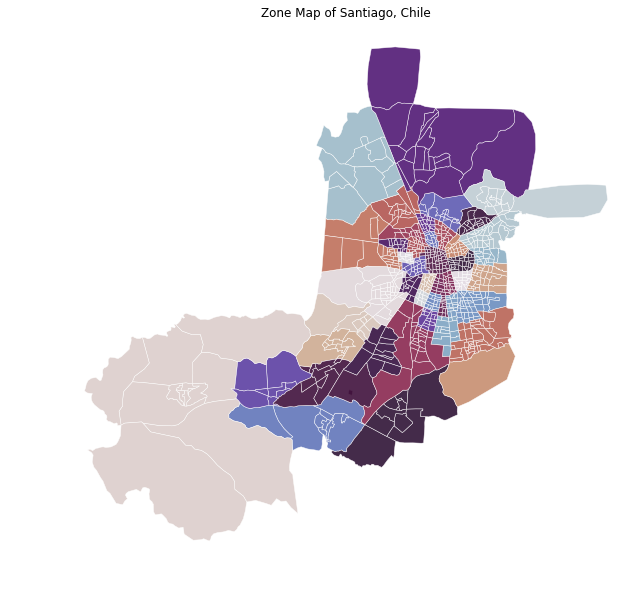

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = shp.plot(column="Comuna", edgecolor='white', 
              cmap = "twilight_shifted", linewidth = 0.5, alpha = 0.9, ax=ax)
ax.set_title("Zone Map of Santiago, Chile")
ax.set_axis_off()

### 1.8.3 Visualize Housing Data

first, create a geopandas dataframe from `df_cleaned`

In [40]:
gdf = gpd.GeoDataFrame(
    df_cleaned, geometry = gpd.points_from_xy(df_cleaned.longitude, df_cleaned.latitude))

In [41]:
gdf[['latitude','longitude','geometry']].head()

,latitude,longitude,geometry
0,-33.729444,-70.779035,POINT (-70.77903 -33.72944)
1,-33.737278,-70.744340,POINT (-70.74434 -33.73728)
2,-33.805994,-70.859656,POINT (-70.85966 -33.80599)
3,-33.805995,-70.859654,POINT (-70.85965 -33.80599)
4,-33.722055,-70.743270,POINT (-70.74327 -33.72205)


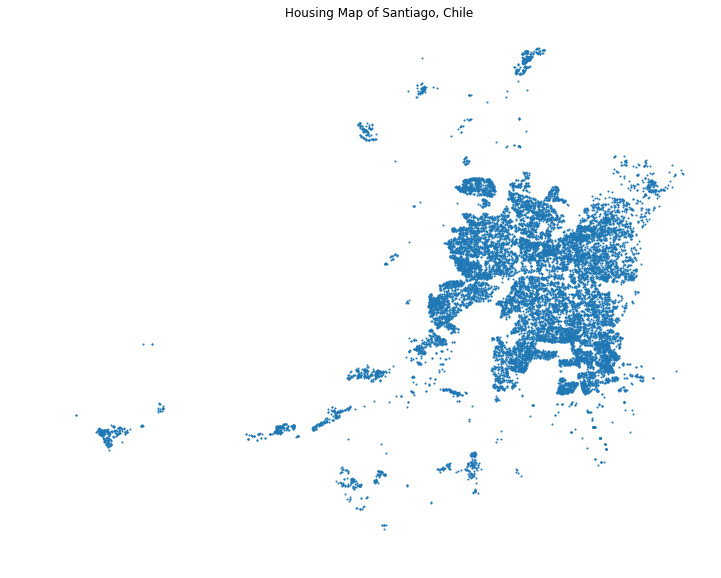

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = gdf.plot(markersize=1,ax=ax)
ax.set_title("Housing Map of Santiago, Chile")
ax.set_axis_off()

# 2. Exploratary Data Analysis (EDA)

## 2.1 Summary Statistics

In [103]:
# print categorical columns
categorical

['cluster_7',
 'type',
 'excluded_from_estimation',
 'cluster_2',
 'exogenous_sector']

In [105]:
# set column type to be categorical
df_cleaned[categorical] = df[categorical].astype('category')

obtain summary statistics of categorical features:

In [106]:
df_cleaned[categorical].describe()

,cluster_7,type,excluded_from_estimation,cluster_2,exogenous_sector
count,17841,17841,17841,17841,17841
unique,7,3,2,2,7
top,5,2,0,1,2
freq,7863,7777,16047,15283,3716


obtain summary statistics of continuous features:

In [100]:
df_cleaned[continuous].describe()

,eduction_transit,monthly_rent,avg_zone_income,construction_quality,survey_factor,commerce_transit,education_years,service_car,education_car,habitational_car,...,longitude,service_transit,household_income,industry_transit,time_CBD,commerce_car,habitational_transit,built_surface,latitude,highway_dis
count,17841.000000,1.784100e+04,1.784100e+04,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,...,17841.000000,17841.000000,1.784100e+04,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000
mean,1331.338951,1.861157e+05,6.789951e+05,0.651793,112.541097,2326.483391,12.140127,6289.291057,3388.664656,58119.291331,...,-70.675161,2542.475915,6.821480e+05,1809.174210,59.274256,5876.956065,21436.587305,49.592579,-33.496907,1.998786
std,729.652034,1.580994e+05,3.748078e+05,0.346713,74.255495,1412.395956,3.524066,1912.388030,849.676400,13920.658856,...,0.108867,1772.182180,7.093147e+05,1030.153261,21.867401,1577.105110,10472.572084,22.232430,0.096565,1.687898
min,23.403120,1.000000e+04,1.475140e+05,0.000000,5.151379,46.226760,0.000000,1061.180000,613.410000,10856.450000,...,-71.262839,56.474950,0.000000e+00,33.553590,2.000000,1048.440000,374.878560,0.000000,-33.810955,0.012117
25%,811.921770,1.102510e+05,4.754700e+05,0.360000,68.388535,1257.907110,10.000000,5083.130000,3058.720000,53012.510000,...,-70.730685,1105.525140,2.993170e+05,1038.710230,45.000000,5081.660000,14151.468420,39.000000,-33.564947,0.887283
50%,1246.854420,1.500000e+05,5.786360e+05,0.780000,94.597099,2078.874310,12.000000,6432.510000,3522.550000,61213.100000,...,-70.659707,2048.700030,5.040160e+05,1656.292430,59.000000,6085.000000,21118.602510,45.400000,-33.490927,1.541765
75%,1832.195310,2.000000e+05,7.227974e+05,0.980000,133.587433,3268.364730,14.000000,7683.200000,3991.320000,68349.480000,...,-70.599503,3552.448550,8.366210e+05,2553.385640,71.000000,6961.840000,29553.563730,56.400000,-33.433232,2.594346
max,3151.932340,5.000000e+06,4.957229e+06,1.000000,927.142761,6096.118100,24.000000,10000.680000,4681.260000,75774.780000,...,-70.463316,7713.396150,1.480000e+07,4536.557030,202.000000,8583.060000,44854.376160,207.300000,-33.177505,13.618582


## 2.2 Explore spatial distributions
In this section, we would like to first explore spatial patterns of some selected continuous features.
The features we select are:
* monthly_rent
* household_income
* education_years

which indicate quality of a household (quality here measures that of both the house and the owner)

In [128]:
import warnings
warnings.filterwarnings("ignore")

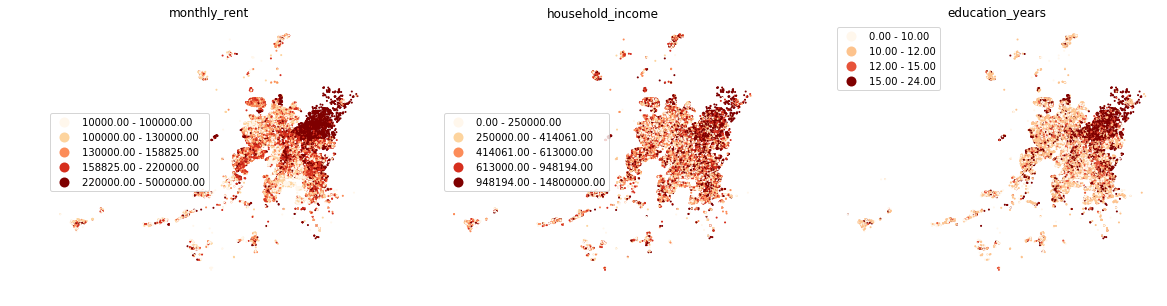

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))

ax1.set_title('monthly_rent')
ax1.set_axis_off()
gdf.plot(markersize=1,ax=ax1,column='monthly_rent',legend=True,cmap = "OrRd",scheme="quantiles")
ax2.set_title('household_income')
ax2.set_axis_off()
gdf.plot(markersize=1,ax=ax2,column='household_income',legend=True,cmap = "OrRd",scheme="quantiles")
ax3.set_title('education_years')
ax3.set_axis_off()
gdf.plot(markersize=1,ax=ax3,column='education_years',legend=True,cmap = "OrRd",scheme="quantiles")

plt.show()

As can be seen from the plots, higher quality households are likely to clutter at the North-East part of the city. We would like to compare our observation with the zonal data, i.e.
* built_surface
* construction_quality
* build_density
* avg_zone_income

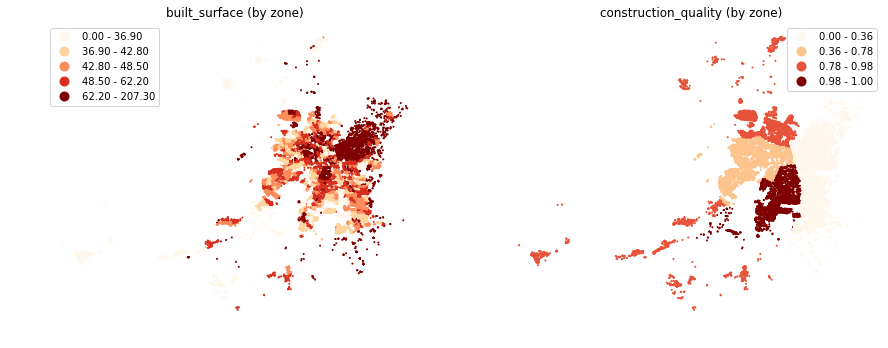

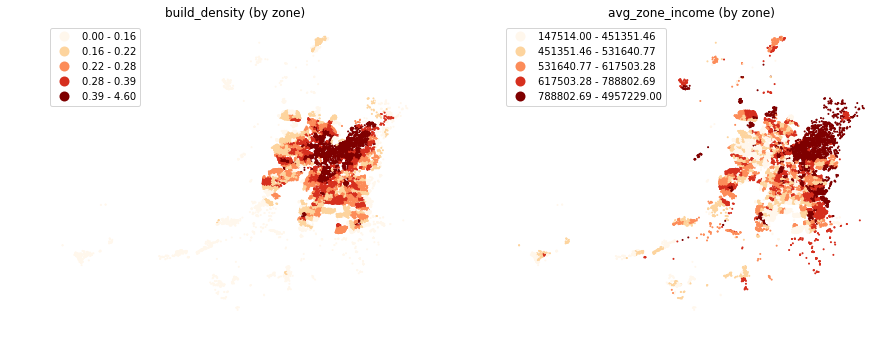

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.set_title('built_surface (by zone)')
ax1.set_axis_off()
gdf.plot(markersize=1,ax=ax1,column='built_surface',legend=True,cmap = "OrRd",scheme="quantiles")
ax2.set_title('construction_quality (by zone)')
ax2.set_axis_off()
gdf.plot(markersize=1,ax=ax2,column='construction_quality',legend=True,cmap = "OrRd",scheme="quantiles")

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,15))
ax3.set_title('build_density (by zone)')
ax3.set_axis_off()
gdf.plot(markersize=1,ax=ax3,column='build_density',legend=True,cmap = "OrRd",scheme="quantiles")
ax4.set_title('avg_zone_income (by zone)')
ax4.set_axis_off()
gdf.plot(markersize=1,ax=ax4,column='avg_zone_income',legend=True,cmap = "OrRd",scheme="quantiles")

plt.show()

It is not to our surprise that better quality households tend to locate in the zones in which built surface and average zone income are the highest. Households with the highest average zone build density seem to be concentrated around the city center. The assumption that the better the household, the better the construction quality, however, does not hold. This can be seen from the plot at the top right corner, which clearly shows that construction quality are the best in zones south of the city and north of the city. Zones in the east that contain many of the best households (as seen from the previous viz), unfortunately, have the worst average construction quality scores.

## 2.3 Explore relationships between features
In this section, we would like to further investigate if there exists strong association between features

# 2.2 one hot encoding

In [40]:
categorical

['cluster_7',
 'type',
 'excluded_from_estimation',
 'cluster_2',
 'exogenous_sector']

In [41]:
df_cleaned.columns.get_loc('cluster_7')

24

In [42]:
df_cleaned.columns.get_loc('type')

6

In [43]:
df_cleaned.columns.get_loc('excluded_from_estimation')

KeyError: 'excluded_from_estimation'

In [ ]:
df_cleaned.columns.get_loc('cluster_2')

In [ ]:
df_cleaned.columns.get_loc('exogenous_sector')

In [ ]:
#one-hot encoding

from sklearn.preprocessing import OneHotEncoder

categorical = ['cluster_7',
 'type',
 'excluded_from_estimation',
 'cluster_2',
 'exogenous_sector']

d = []
for i in categorical:
    result = df_cleaned.columns.get_loc(i)
    d.append(result)


onehotencoder = OneHotEncoder(categorical_features = d) 
df_cleaned = onehotencoder.fit_transform(df_cleaned).toarray()


# 2.3 standardization

In [69]:
X = df_cleaned.drop(['type'], axis=1)
y = df_cleaned['type']


# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

#feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 2.4 feature engineering

In [72]:
def Train_Test_Split(dataframe):
    test=dataframe[(dataframe.latitude < -33.4) & (dataframe.latitude > -33.5) &
                   (dataframe.longitude > -70.7) & (dataframe.longitude < -70.6)]
    train=dataframe[(dataframe.latitude > -33.4) | (dataframe.latitude < -33.5) |
                    (dataframe.longitude < -70.7) | (dataframe.longitude > -70.6)]
    return train, test

In [73]:
train, test = Train_Test_Split(df)

In [84]:
def Features_Label_Split(dataframe):
    label = dataframe[['type']]
    features = dataframe.drop(['type'], axis=1)
    return features, label

In [85]:
feature, label = Features_Label_Split(train)

# 3. Define functions for fitted model
(Logistic Regression/KNN/Linear Regression/SVC/Random forest/NN)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def logistic_reg_model(X_train, X_test, y_train):
    
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred1 = classifier.predict(X_test)
    
    return y_pred1

In [ ]:
def linear_regression(X_train, X_test, y_train):
    
    classifier = LinearRegression()
    classifier.fit(X_train,y_train)
    y_pred2 = classifier.predict(X_test)
    
    return y_pred2

In [ ]:
def knn_model(X_train, X_test, y_train, n):
    
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(X_train,y_train)
    y_pred3 = classifier.predict(X_test)
    
    return y_pred3

In [ ]:
def svm_model(X_train, X_test, y_train):
    
    classifier = SVC 
    classifier.fit(X_train, y_train)
    y_pred4 = classifier.predict(X_test)
    
    return y_pred4

In [ ]:
def random_forest(X_train, X_test, y_train)

    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    y_pred5 = classifier.predict(X_test)
    
    return y_pred5

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

def nn_model(X_train, y_train, num_epochs=15, batch_size=2048):

    classifier = Sequential()
    classifier.add(Dense(150, input_dim=30, activation='relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(100, activation='relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(30, activation='relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    classifier.fit(X_train,y_train,epochs=num_epochs, batch_size=batch_size, verbose=2)
    
    # predict the result 
    y_pred6 = predict(X_test)
    
    return y_pred6